# pyCompare Demo

This notebook gives an examples of using `pyCompare` to generate Bland-Altman plots.

In [1]:
import pyCompare

In [2]:
method1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [3]:
method2 = [1.03, 2.05, 2.79, 3.67, 5.00, 5.82, 7.16, 7.69, 8.53, 10.38, 11.11, 12.17, 13.47, 13.83, 15.15, 16.12, 16.94, 18.09, 19.13, 19.54]

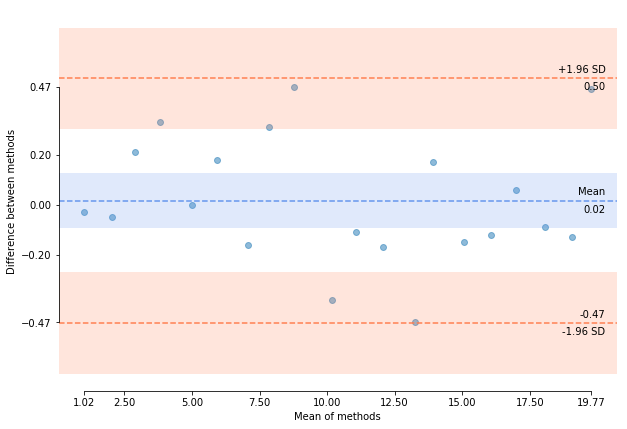

In [4]:
pyCompare.blandAltman(method1, method2)

## Limits of Agreement

`pyCompare` uses ±1.96 times the standard deviation as the default limit of agreement, this can be modified with the `limitOfAgreement=` argument.

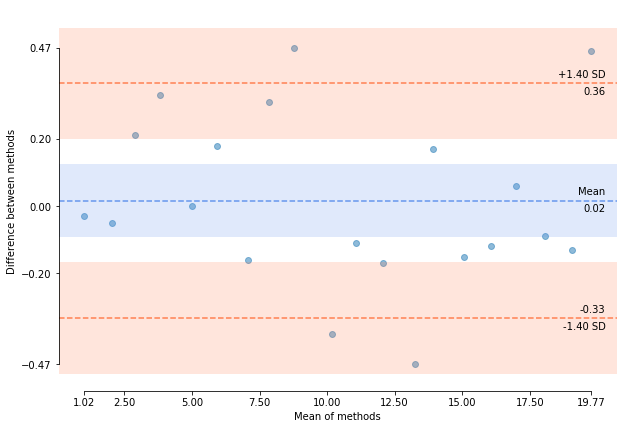

In [5]:
pyCompare.blandAltman(method1, method2, limitOfAgreement=1.4)

## Confidence Intervals

By default confidence intervals on the mean difference and limits of agreement are plotted over the 95% range, this can be adjusted with the `confidenceInterval=` argument. 

Use `confidenceInterval=None` to suppress the plotting of CIs.

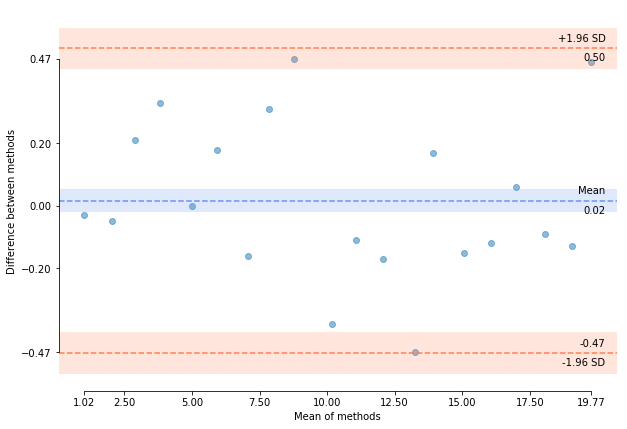

In [6]:
pyCompare.blandAltman(method1, method2, confidenceInterval=50)

Confidence intervals are calculated using Bland & Altman's approximate method by default.

For small numbers of measurements, more precise estimates can be generated at the expense of much slower plotting times by selecting Carkeet's exact paired method *via* the `confidenceIntervalMethod=` argument.

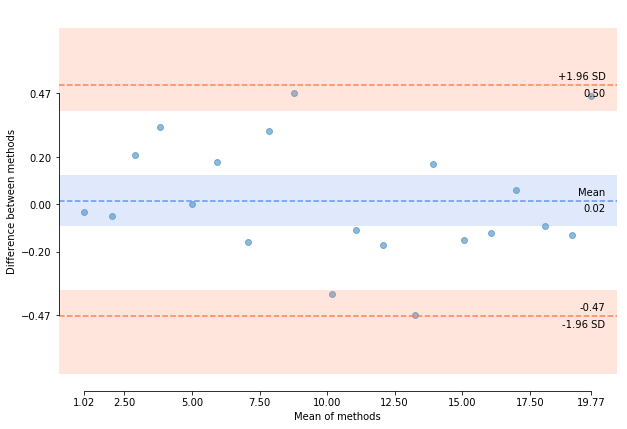

In [7]:
## By default don't run this in Binder as it is so expensive

# pyCompare.blandAltman(method1, method2, confidenceIntervalMethod='exact paired')

## Differences as percentages
`pyCompare` can plot differences as percentages, instead of the units used by the methods, using the `percentage` flag.

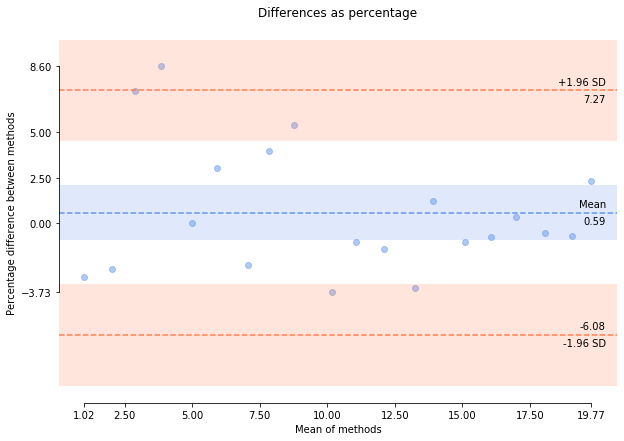

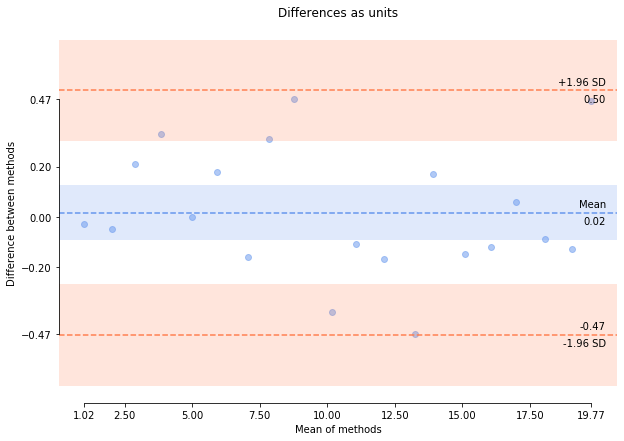

In [8]:
pyCompare.blandAltman(method1, method2, percentage=True, 
                      title='Differences as percentage',
                      )
pyCompare.blandAltman(method1, method2, percentage=False,
                      title='Differences as units',
                      )


## Multiplicative offsets

`pyCompare` can model and remove multiplicative offsets between measures using orthogonal distance regression by using the `detrend=` option.

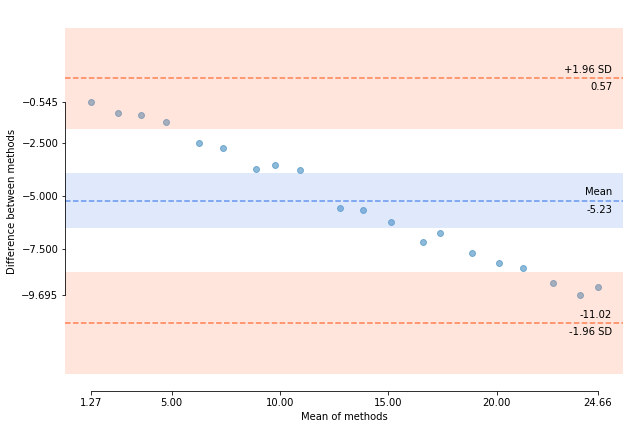

In [9]:
# Introduce a multiplicative offset
method2 = [x * 1.5 for x in method2]

# Plot showing a multiplicative offset
pyCompare.blandAltman(method1, method2)

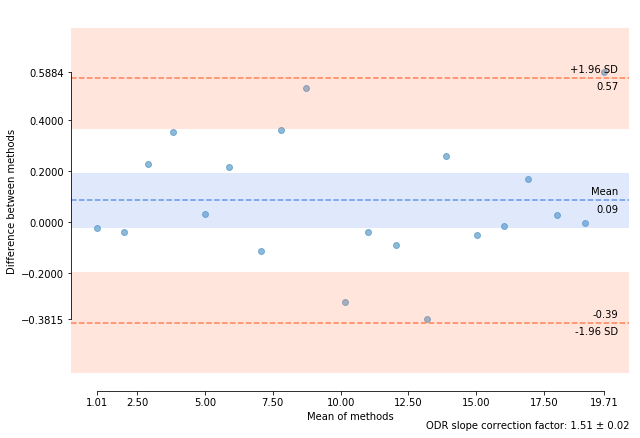

In [10]:
# Offset modeled and removed - see the estimated slope in the lower right corner.

pyCompare.blandAltman(method1, method2, detrend='ODR')